Our case is based upon Bibitor, LLC*note1, a liquor store chain in the fictional state of Lincoln. It is a major retailer with approximately 80 locations and total sales in excess of $450 million.
Bibitor has asked the team to complete due diligence on their wine and spirits business looking at data for their beginning and ending inventory, purchases and sales for a 12 month period.

In [56]:
import pandas as pd
purchases = pd.read_csv('PurchasesFINAL12312016.csv') 
purchase_prices = pd.read_csv('2017PurchasePricesDec.csv') 
vendor_invoices = pd.read_csv('InvoicePurchases12312016.csv')

begin_inventory = pd.read_csv('BegInvFINAL12312016.csv') 
end_inventory = pd.read_csv('EndInvFINAL12312016.csv') 

sales = pd.read_csv('SalesFINAL12312016.csv') 

#NOTE: Assume that quantities & prices in table BegInvDec are as-of 12/1/2016. 

 

1. Inventory

In [57]:
inventory = pd.merge(begin_inventory, end_inventory, on='InventoryId', how='inner') #keeps only common IDs between frames
inventory['average_inventory'] = (inventory['onHand_x'] + inventory['onHand_y'])*inventory['Price_x']/2

In [58]:
print(inventory.shape)
print(begin_inventory.shape)
print(end_inventory.shape)

#Missing inventory data

(174976, 18)
(206529, 9)
(224489, 9)


In [146]:
inventory_perstore = inventory.groupby('Store_x', as_index = False)['average_inventory'].agg('sum')
inventory_perstore['Store'] = inventory_perstore['Store_x']

2. Purchase analysis

In [59]:
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372469,49_GARIGILL_22298,49,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2
2372470,1_HARDERSFIELD_19556,1,19556,Zorvino Bacca Z Blackberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-27,2017-01-09,2017-02-06,9.39,12,112.68,2
2372471,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,6.75,12,81.00,2
2372472,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,9.39,12,112.68,2


In [71]:
purchase_perstore = purchases.groupby('Store', as_index = False)['Dollars'].agg('sum')
purchase_perproduct = purchases.groupby('Brand', as_index = False)['Dollars'].agg('sum')


3. Sales analysis

In [72]:
sales_perstore = sales.groupby('Store', as_index = False)['SalesDollars'].agg('sum')
sales_perproduct = sales.groupby('Brand', as_index = False)['SalesDollars'].agg('sum')

In [73]:
sales['SalesDollars'].agg('sum')  #450 million dollar in sales

452062952.0199993

In [150]:
profit_perstore = pd.merge(sales_perstore, purchase_perstore, on='Store', how='inner') #keeps only common IDs between frames
profit_perstore = pd.merge(profit_perstore, inventory_perstore, on='Store', how='inner') 
profit_perstore['profit'] = profit_perstore['SalesDollars'] - profit_perstore['Dollars']
profit_perstore['InventoryTurnover'] = profit_perstore['Dollars']/profit_perstore['average_inventory']
profit_perstore 

,Store,SalesDollars,Dollars,Store_x,average_inventory,profit,InventoryTurnover
0,1,6665667.42,4844714.06,1,881087.015,1820953.36,5.498565
1,2,6431522.53,4504046.53,2,757027.315,1927476.00,5.949649
2,3,419732.96,286621.82,3,121627.245,133111.14,2.356559
3,4,3146860.80,2247278.50,4,738390.255,899582.30,3.043483
4,5,1334783.32,956212.60,5,220384.065,378570.72,4.338846
...,...,...,...,...,...,...,...
73,75,3707234.76,2590808.34,75,476932.545,1116426.42,5.432232
74,76,25451535.24,17525106.25,76,2500314.965,7926428.99,7.009159
75,77,3654768.34,2656433.43,77,600723.090,998334.91,4.422060
76,78,2920969.18,2231545.53,78,342668.135,689423.65,6.512264


In [75]:
profit_perproduct = pd.merge(sales_perproduct, purchase_perproduct, on='Brand', how='inner') #keeps only common IDs between frames
profit_perproduct['profit'] = profit_perproduct['SalesDollars'] - profit_perproduct['Dollars']
profit_perproduct

,Brand,SalesDollars,Dollars,profit
0,58,43341.54,32944.00,10397.54
1,60,18716.25,12084.20,6632.05
2,61,4364.88,3307.20,1057.68
3,62,119863.75,91744.00,28119.75
4,63,112249.22,86963.30,25285.92
...,...,...,...,...
10481,90089,19078.41,2493.44,16584.97
10482,90090,9749.85,2689.62,7060.23
10483,90604,9119.24,9253.56,-134.32
10484,90609,2074.17,5457.00,-3382.83


In [105]:
brands_making_losses = profit_perproduct[profit_perproduct['profit'] < 0]
brands_making_losses

,Brand,SalesDollars,Dollars,profit
30,131,223.86,309.60,-85.74
34,156,1519.24,4138.50,-2619.26
60,203,41.98,47.34,-5.36
62,206,233.87,375.26,-141.39
68,222,2878.56,3006.12,-127.56
...,...,...,...,...
10467,47049,794.70,910.20,-115.50
10468,47075,713.10,822.36,-109.26
10470,50354,229.95,360.72,-130.77
10483,90604,9119.24,9253.56,-134.32


In [110]:
total_loss = brands_making_losses["profit"].sum()
total_loss

-4053230.59

In [133]:
top_500_loss = brands_making_losses.nsmallest(500, 'profit')
top_500_loss

,Brand,SalesDollars,Dollars,profit
989,2277,20272.54,72275.32,-52002.78
2295,4785,21237.26,59398.95,-38161.69
992,2289,11062.63,44489.34,-33426.71
2565,5609,2575.70,33560.28,-30984.58
1586,3365,12569.97,41850.60,-29280.63
...,...,...,...,...
1107,2550,21031.91,23220.47,-2188.56
8444,26689,489.90,2672.04,-2182.14
8376,26502,351.84,2530.08,-2178.24
900,2141,731.88,2904.00,-2172.12


In [83]:
sales['month'] = sales['SalesDate'].astype('datetime64').dt.month_name()
sales_permonth = sales.groupby('month', as_index = False)['SalesDollars'].agg('sum')

month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sales_permonth['month'] = pd.Categorical(sales_permonth['month'], categories=month_order, ordered=True)
sales_permonth = sales_permonth.sort_values('month')
sales_permonth = sales_permonth.reset_index(drop=True)

sales_permonth

,month,SalesDollars
0,January,29854027.92
1,February,28876607.23
2,March,28988411.94
3,April,30723734.63
4,May,36041210.52
5,June,39290701.46
6,July,49696466.85
7,August,39056166.03
8,September,38477538.83
9,October,36433141.73


Analyze

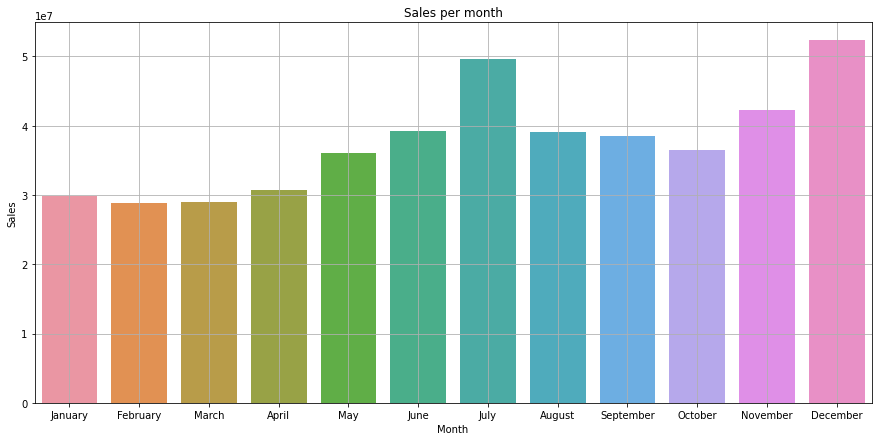

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize =(15, 7))
sns.barplot(x='month', y='SalesDollars', data=sales_permonth)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales per month")
plt.grid(True)
plt.savefig('Sales per month.png', dpi=300)
plt.show()

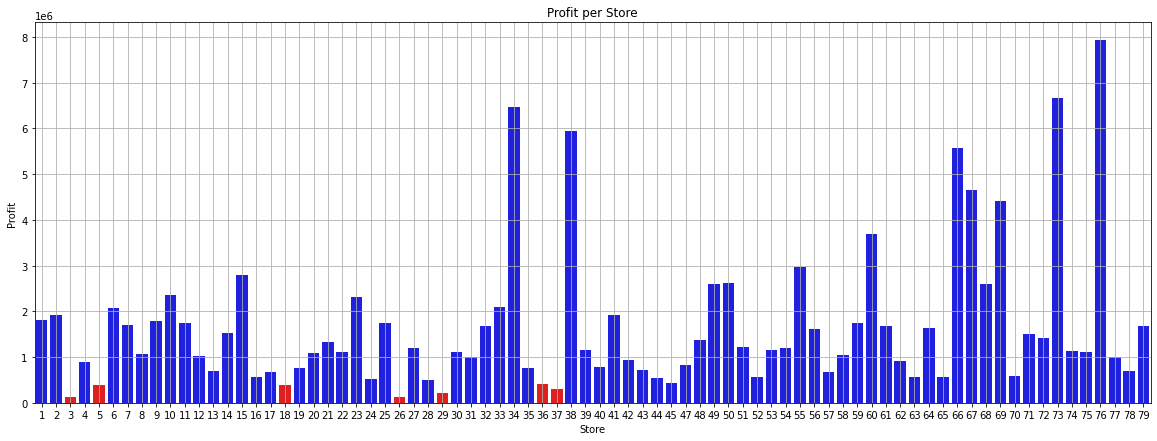

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

threshold = sorted(profit_perstore['profit'])[int(len(profit_perstore['profit']) * 0.1)]
color_below_threshold = 'red'

fig = plt.figure(figsize =(20, 7))
sns.barplot(x='Store', y='profit', data=profit_perstore, palette=[color_below_threshold if val < threshold else 'blue' for val in profit_perstore['profit']])
plt.xlabel("Store")
plt.ylabel("Profit")
plt.title("Profit per Store")
plt.grid(True)
plt.savefig('Profit per store.png', dpi=300)
plt.show()

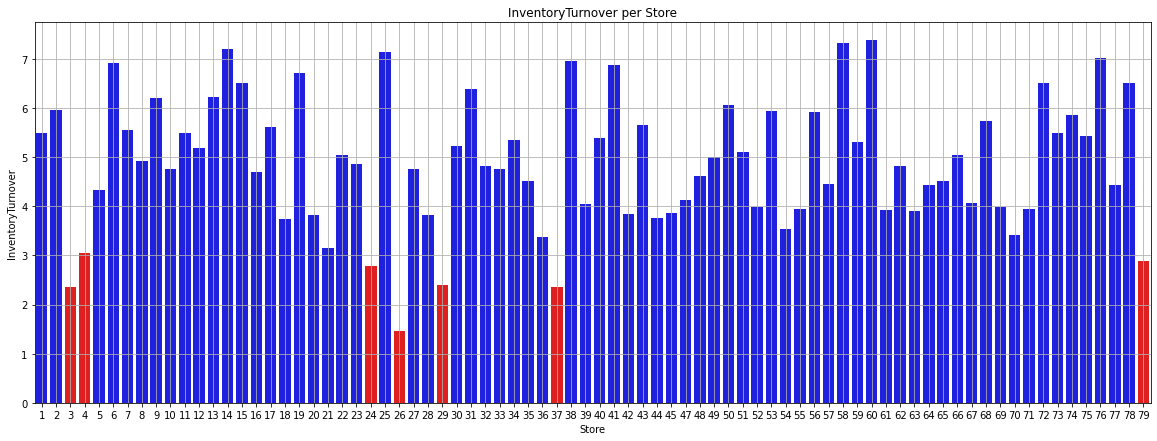

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

threshold = sorted(profit_perstore['InventoryTurnover'])[int(len(profit_perstore['InventoryTurnover']) * 0.1)]
color_below_threshold = 'red'

fig = plt.figure(figsize =(20, 7))
sns.barplot(x='Store', y='InventoryTurnover', data=profit_perstore, palette=[color_below_threshold if val < threshold else 'blue' for val in profit_perstore['InventoryTurnover']])
plt.xlabel("Store")
plt.ylabel("InventoryTurnover")
plt.title("InventoryTurnover per Store")
plt.grid(True)
plt.savefig('InventoryTurnover per store.png', dpi=300)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


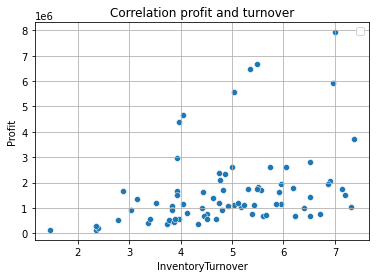

In [154]:
sns.scatterplot(data=profit_perstore, x='InventoryTurnover', y='profit')
plt.xlabel("InventoryTurnover")
plt.ylabel("Profit")
plt.title("Correlation profit and turnover")
plt.grid(True)
plt.legend()
plt.show()

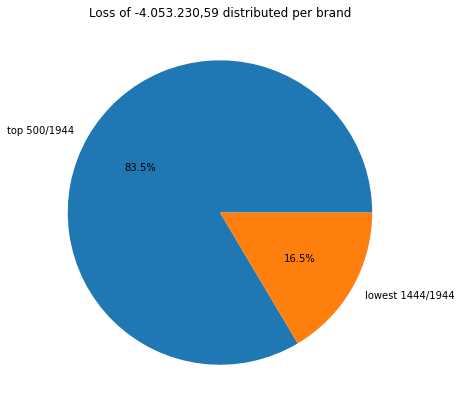

In [137]:
losses = [top_500_loss["profit"].sum()*-1, ((total_loss*-1)-(top_500_loss["profit"].sum()*-1))]
fig = plt.figure(figsize =(10, 7))
plt.pie(losses, labels = ['top 500/1944', 'lowest 1444/1944' ], autopct = "%1.1f%%")
plt.title("Loss of -4.053.230,59 distributed per brand")
plt.show()

Conclusions

Recommendations
1. Optimize Inventory Levels: Look into the top 500 brands that make a loss. Consider implementing an inventory management system that tracks sales trends and automates reordering processes. This will help optimize inventory levels, reduce carrying costs, and ensure a diverse product offering.
2. Enhance Supplier Relationships: Evaluate the performance of key suppliers and negotiate favorable pricing and terms. Consider establishing strategic partnerships with key suppliers to secure competitive pricing, access exclusive products, and ensure a reliable supply chain.
3. Implement Sales and Promotions Strategy: Develop a targeted sales and promotions strategy based on customer preferences per store and seasonal trends (July and December). Offer special promotions, discounts, or bundle deals to drive sales and attract new customers. Leverage customer data to personalize marketing efforts and improve customer loyalty.